<a href="https://colab.research.google.com/github/SiyaaNegi/PraticeProjects/blob/main/Blinkit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blinkit Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing raw data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/blinkit_data.csv")


In [ ]:
#verifying the succesfull import.
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [ ]:
print("size of the Data: ", df.shape)

size of the Data:  (8523, 12)


# Field info


In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [14]:
print(df['Item Fat Content'].unique())
print(df['Item Type'].unique())
print(df['Outlet Identifier'].unique())
print(df['Outlet Establishment Year'].unique())
print(df['Outlet Size'].unique())

['Regular' 'Low Fat']
['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']
['OUT049' 'OUT018' 'OUT046' 'OUT013' 'OUT045' 'OUT017' 'OUT010' 'OUT027'
 'OUT035' 'OUT019']
[2012 2022 2010 2000 2015 2020 2011 1998 2017]
['Medium' 'Small' 'High']


In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## KPI Requirements


In [15]:
#total sales
total_sales = df['Sales'].sum()

#Average sales
avg_sales = df['Sales'].mean()

#Number of items sold
num_sold_items = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"Number of Items Sold: {num_sold_items:,.0f}")
print(f"Average Ratings: {avg_ratings:,.0f}")

Total Sales: $1,201,681
Average Sales: $141
Number of Items Sold: 8,523
Average Ratings: 4


## Visualization


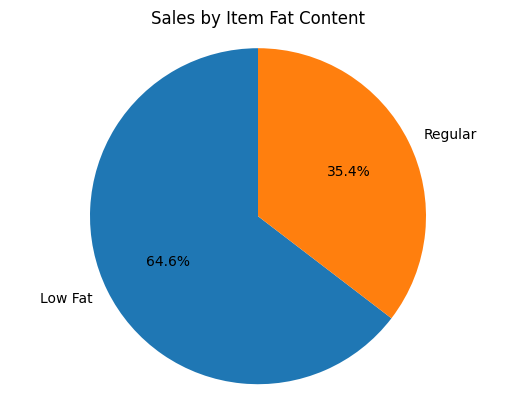

In [16]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie (sales_by_fat, labels= sales_by_fat.index,
                      autopct= '%.1f%%', startangle =90)
plt.title('Sales by Item Fat Content')
plt.axis('equal')
plt.show()


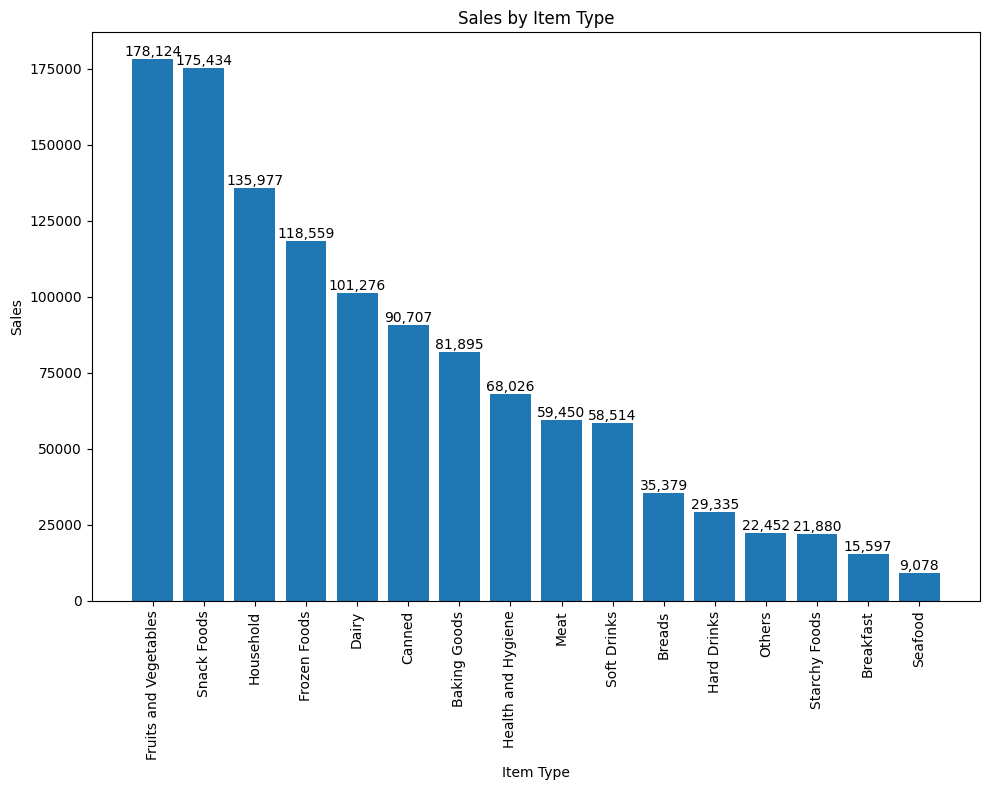

In [27]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,8))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.title('Sales by Item Type')
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Sales')

for bar in bars:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
           f'{bar.get_height():,.0f}'
  , ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
plt.show()

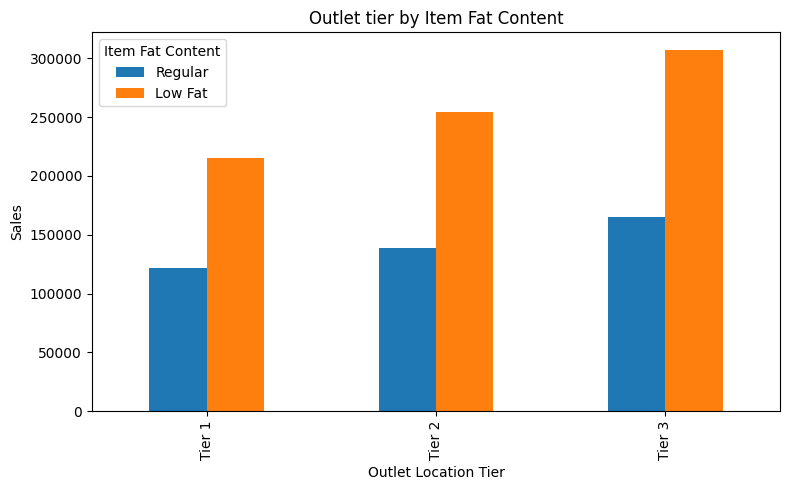

In [30]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind ='bar', figsize =(8,5), title = 'Outlet tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

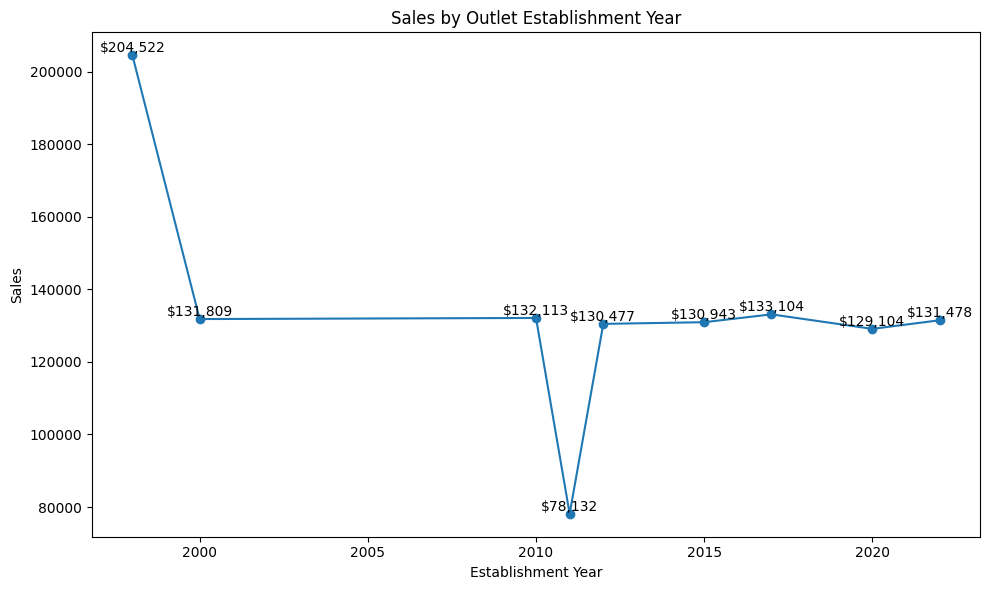

In [33]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Sales')

for x, y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

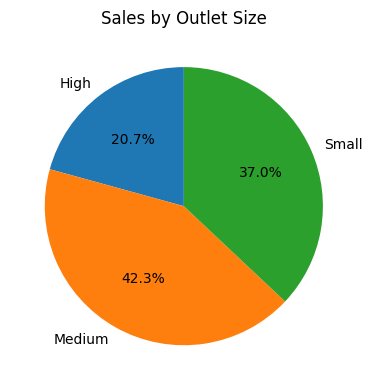

In [36]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%.1f%%', startangle = 90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

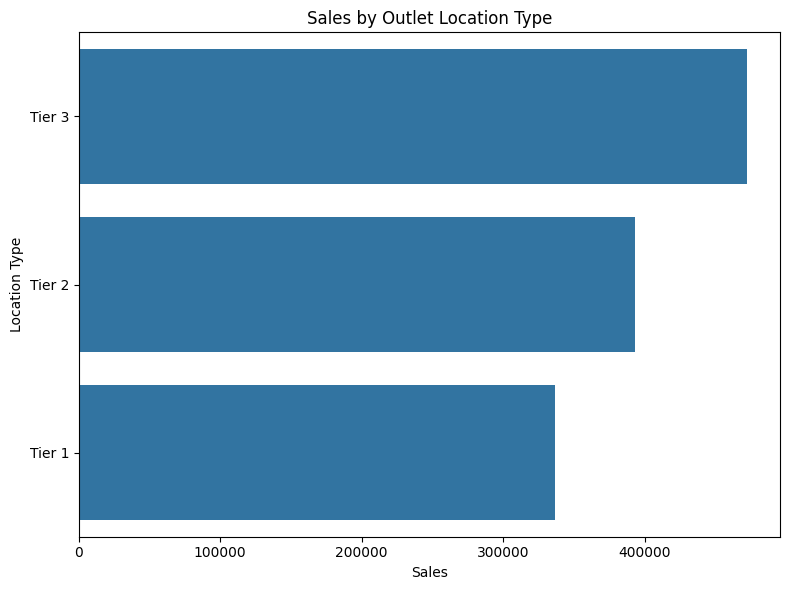

In [39]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by = 'Sales', ascending = False)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Sales', y= 'Outlet Location Type', data = sales_by_location)

plt.title('Sales by Outlet Location Type')
plt.xlabel('Sales')
plt.ylabel('Location Type')

plt.tight_layout()
plt.show()